In [31]:
import pandas as pd
import numpy as np
import faiss
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

In [32]:
# load our full coffee data
data = pd.read_csv("../data/processed/preprocessed_data.csv")
# load model embeddings index 
index = faiss.read_index("../data/outputs/faiss/faiss_index.bin")
# load model embeddings
embeddings = np.load("../data/outputs/all_embeddings.npy")

print(type(embeddings)) 

<class 'numpy.ndarray'>


In [33]:
# center and normalize embeddings
scaler = StandardScaler()
normed_emb = scaler.fit_transform(embeddings)

In [34]:
start_time = time.time()


pca = PCA(n_components=2)
pc = pca.fit_transform(normed_emb)

end_time = time.time()

duration = end_time - start_time

print(f"PCA with sklearn took: {duration} seconds")

PCA with sklearn took: 0.06277632713317871 seconds


In [42]:
k_vals = [i for i in range(2, 101)]
best_k = 2
best_sil_score = -1.
sil_scores = {}
X = normed_emb
for k in k_vals:
    print(f"Running {k}-Means")
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, cluster_labels)
    sil_scores[k] = sil_score
    print(f"For k = {k}, Silhouette Score: {sil_score}")
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k = k
        
print(best_k)
print(best_sil_score)

Running 2-Means
For k = 2, Silhouette Score: 0.1414176970720291
Running 3-Means
For k = 3, Silhouette Score: 0.15826880931854248
Running 4-Means
For k = 4, Silhouette Score: 0.16839417815208435
Running 5-Means
For k = 5, Silhouette Score: 0.14054717123508453
Running 6-Means
For k = 6, Silhouette Score: 0.12431493401527405
Running 7-Means
For k = 7, Silhouette Score: 0.13228529691696167
Running 8-Means
For k = 8, Silhouette Score: 0.1478264182806015
Running 9-Means
For k = 9, Silhouette Score: 0.16195979714393616
Running 10-Means
For k = 10, Silhouette Score: 0.16487032175064087
Running 11-Means
For k = 11, Silhouette Score: 0.16526541113853455
Running 12-Means
For k = 12, Silhouette Score: 0.1513928323984146
Running 13-Means
For k = 13, Silhouette Score: 0.15984489023685455
Running 14-Means
For k = 14, Silhouette Score: 0.16360755264759064
Running 15-Means
For k = 15, Silhouette Score: 0.17127537727355957
Running 16-Means
For k = 16, Silhouette Score: 0.15730123221874237
Running 17-Mea

Dimensionality reduced to 2D.
Step 5: Visualizing the final clusters...


/tmp/ipykernel_20624/3311006747.py:15: UserWarning: Mismatched number of handles and labels: len(handles) = 8 len(labels) = 15
  plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(best_k)])


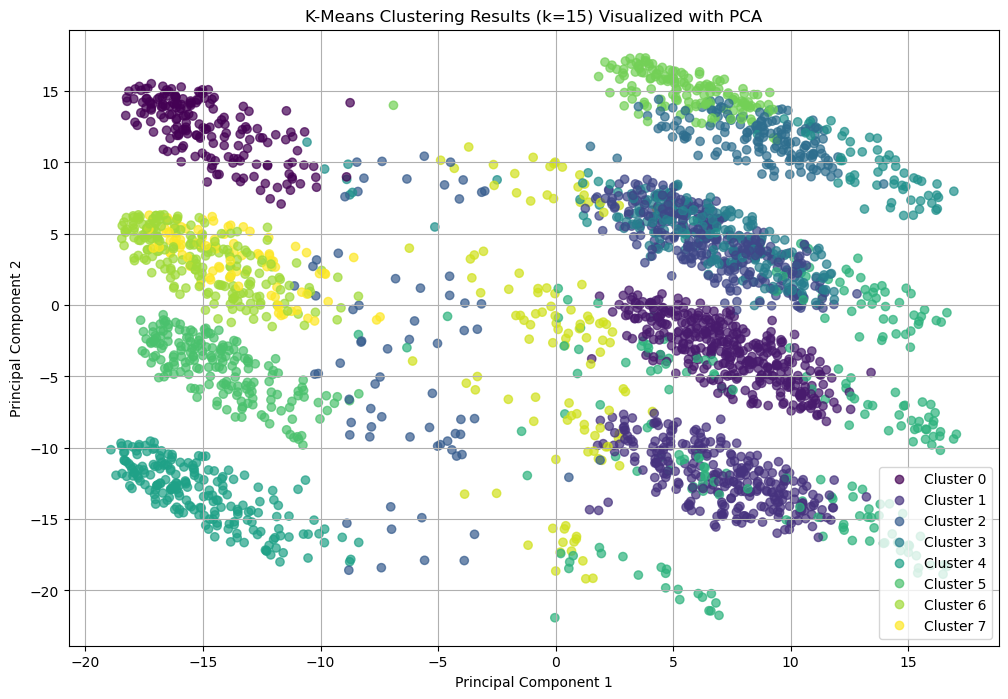

In [43]:

final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_clusters = final_kmeans.fit_predict(normed_emb)

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(normed_emb)
print("Dimensionality reduced to 2D.")

# 5. Visualize the clusters
print("Step 5: Visualizing the final clusters...")
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=final_clusters, cmap='viridis', alpha=0.7)
plt.title(f'K-Means Clustering Results (k={best_k}) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(best_k)])
plt.grid(True)
plt.show()